In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, os
root = os.path.join(os.getcwd(), '../../')
sys.path.append(root)

import math

In [54]:
from gpt import GPT
from gpt.bstatic import Sectormagnet
from gpt.element import Screen
from gpt.element import Lattice

merger = Lattice('LEReC-Merger')

min_clearance = 0.0254     # [1"] meters
pipe_diameter = 2.0*0.0254 # [1"] meters
  
angle = 20
p = 1e6
R = 0.8594366926962348
pipe_length=4.2

scale = 1

merger.add(Sectormagnet('b1', R, +angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05, fix=True), ds=0.25)
merger.add(Sectormagnet('b2', R, -angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05, fix=True), ds=pipe_length)

#merger.add(Map1D_B('sol4', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=+scale, field_pos='center'), ds=1.05, ref_element='b1', element_origin='center')
#merger.add(Map1D_B('sol5', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=-scale, field_pos='center'), ds=3.15, ref_element='b1', element_origin='center')
merger.add(Screen('scr1'), ref_element='b1', ds=2.1)
merger.add(Screen('scr2'), ds=0.05)


merger2 = Lattice('LEReC-Merger2')

min_clearance = 0.0254     # [1"] meters
pipe_diameter = 2.0*0.0254 # [1"] meters
  
angle = 20
p = 1e6
R = 0.8594366926962348
pipe_length=4.2

scale = 1

merger2.add(Sectormagnet('b3', R, +angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05, fix=True), ds=0.25)
merger2.add(Sectormagnet('b4', R, -angle, p, phi_in=angle/4, phi_out=angle/4, gap=0.05, fix=True), ds=pipe_length)

#merger.add(Map1D_B('sol4', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=+scale, field_pos='center'), ds=1.05, ref_element='b1', element_origin='center')
#merger.add(Map1D_B('sol5', SOL2_FILE, column_names={'z':'z', 'Bz':'Bz'}, width=0.6, scale=-scale, field_pos='center'), ds=3.15, ref_element='b1', element_origin='center')
merger2.add(Screen('scr3'), ref_element='b3', ds=2.1)
merger2.add(Screen('scr4'), ds=0.05)

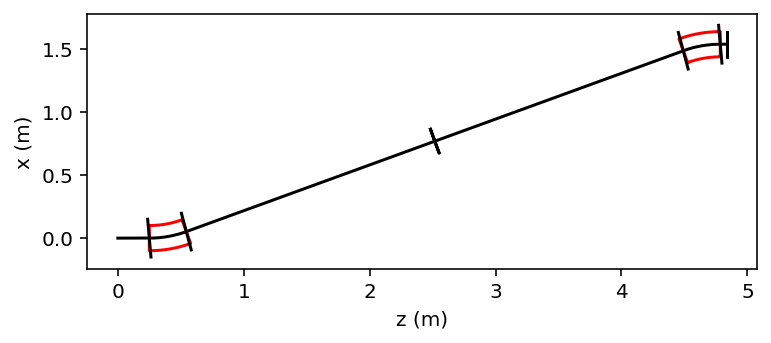

In [41]:
merger.plot_floor();

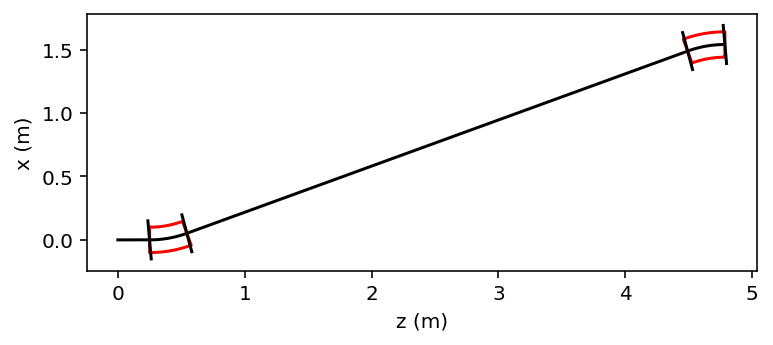

In [42]:
merger2.plot_floor();

In [64]:
combo = merger.combine(merger2)

10.2

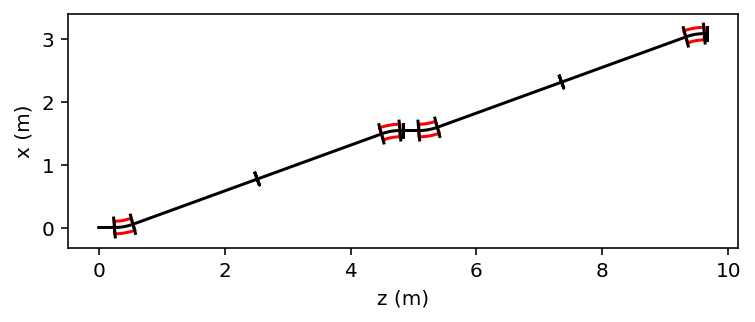

In [65]:
combo.plot_floor()

combo[-1].s_beg

In [95]:
from pmd_beamphysics import single_particle

particle = single_particle(pz=p)

combo.write_gpt_lines(output_file='gpt.temp.in')

from gpt import GPT

G = GPT(input_file='gpt.temp.in', initial_particles=particle)
G.set_variables({'Ntout':100, 'tmax':1.3*10/3e8, 'GBacc':6.5})
G.run()
print(G)


GPT object:
   Original input file: gpt.temp.in
   Template location: /Users/colwyngulliford/Documents/GitHub/lume-gpt/examples/elements
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp_bk339ge
   Timeout: None (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.12104296684265137 (sec)


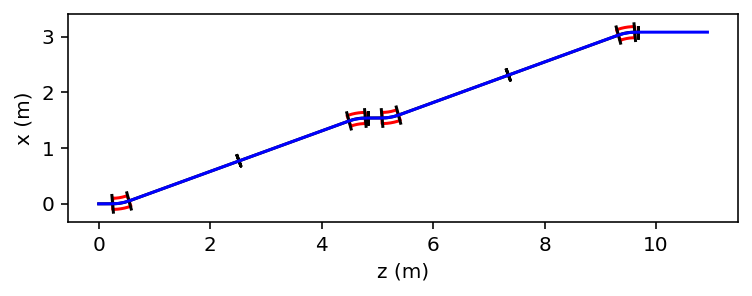

In [96]:
combo.plot_floor(axis='equal');
plt.plot(G.stat('mean_z','tout'), G.stat('mean_x','tout'), 'b')
plt.xlabel('z (m)');
plt.ylabel('x (m)');


In [99]:
G.s_ccs

[0.0,
 0.11568168517364956,
 0.2313633703473031,
 0.34704505553704984,
 0.4627267406197379,
 0.5784084257214773,
 0.6940901107715871,
 0.8097717958569515,
 0.9254534809423342,
 1.0411351660277168,
 1.1568168511130994,
 1.272498536198482,
 1.3881802212838645,
 1.503861906369247,
 1.6195435914546297,
 1.7352252765400122,
 1.8509069616253948,
 1.9665886467107774,
 2.08227033179616,
 2.197952016881543,
 2.313633701966926,
 2.429315387052309,
 2.544997072137692,
 2.6606787572230752,
 2.7763604423084582,
 2.8920421273938413,
 3.0077238124792243,
 3.1234054975646073,
 3.2390871826499903,
 3.3547688677353733,
 3.4704505528207563,
 3.5861322379061393,
 3.7018139229915223,
 3.8174956080769054,
 3.9331772931622884,
 4.048858978247671,
 4.164540663333054,
 4.2802223484184365,
 4.395904033503819,
 4.511585718589202,
 4.627267403674585,
 4.742949088759979,
 4.85863077387215,
 4.974312458902336,
 5.08999414395085,
 5.205675828924496,
 5.32135751392389,
 5.43703919893479,
 5.5527208838983215,
 5.66840